## Changing Seasons, Changing Songs ##
### Comparing the Genres of Songs on my Summer and Fall 2022 Spotify playlists ###

The goal of this project is to discover if I listen to different genres at different times of year or if I have favorite genres that surpass the boundaries of seasons.


I started the project by loading in the needed packages.

In [186]:
import json
import pandas as pd
import requests
import base64

In [187]:
keys = pd.read_csv("Spotify-Keys_9-23-21", header = 0, sep = ",")

In [188]:
appid = keys['Client_ID'][0]

In [189]:
appsecret = keys['Client_Secret'][0]

In [190]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [191]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [192]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [193]:
response = requests.post(access_token_url, headers = header, data = payload)

In [194]:
session_token = response.json()['access_token']

In [195]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

### Fall 2022 Data Collection ###

I collected the fall data by first loading in the playlist information and creating a data frame with each track as an individual row. Then I created a data frame with each artist as a row. I combined them into one using the merge function and deleted all the unneeded columns. Lastly, I exported the data frame as a CSV file.

In [196]:
fall_2022_id = '5qFxkaLI6E8pCj7eBytI5v'

In [197]:
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(fall_2022_id)

In [198]:
fall_2022_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)

In [199]:
fall_2022_tracks.status_code

200

In [200]:
fall_2022_dict = json.loads(fall_2022_tracks.text)

In [201]:
fall_2022_dict.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [202]:
fall_2022_dict['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [203]:
fall_2022_dict['items'][0]['track']['id']

'2uatFg68ynGEapEel9ASuK'

In [204]:
fall_2022_dict['items'][0]['track']['artists'][0].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [205]:
fall_2022_dict['items'][0]['track']['artists'][0]['id']

'7vtSUU3zpHeYJfX6BPNrJd'

In [206]:
fall_2022_track_ids = [x['track']['id'] for x in fall_2022_dict['items']]

In [207]:
fall_2022_track_ids

['2uatFg68ynGEapEel9ASuK',
 '53taBvemC88CMHP2I1xAFX',
 '7sgNQ34g23PpgpfAAuxMPy',
 '4HHqDiNjHlsWtxqXoTR00O',
 '4VeCmOb1rAEZQfH7Rlms9C',
 '78vv48Ic6syaE6kWqDGY47',
 '3Hvg5tRKsQlX25wYwgMF9p',
 '6lCvK2AR2uOKkVFCVlAzzm',
 '57V4uc2b2diZ4RPHXWecb9',
 '3Z2anmIVG8b1GelyeFQdnP',
 '0zesU7Cq6UM582kMYC6J3E',
 '7nDFTHHwfe32a8qdp9XqPy',
 '3rXCZRMiMZp0feGcYXpwYX',
 '7trx783SvnHhKkmgSSTIFJ',
 '01K4zKU104LyJ8gMb7227B',
 '5ASPgiUgnrHCfwnJlh04ZR',
 '2qhfWLkKqWripwiw8DJdGU',
 '3o1cohFfwd57rAvrbyVE5e',
 '0GNVXNz7Jkicfk2mp5OyG5',
 '3cfeJE1UxGSOdtaQPkR2nd',
 '6sQckd3Z8NPxVVKUnavY1F',
 '7yNTZj1ugKCeRJdSP1meOk',
 '3hiuZQQ33aDnu4Xmmn8Lr7',
 '6vIyrLqStTPvZ6zwdW0zNw',
 '14Aob2QYJ9Ija9pw9eJSI7',
 '75nZ4W6quZhI55LKiqCXWh',
 '1YenbnUpxiTyG15aLTl7JO',
 '4GvdsVns332wQ3JsWAg2OV',
 '3ekNuTF3UpOvIZCfiejpnC',
 '5enxwA8aAbwZbf5qCHORXi',
 '2CK9xYMVdmJMPKZyArVbt4',
 '4Ifsg8iWpPy5qN5GDHnpta',
 '0ZAbupc7jAQpG9IxojQ3s3',
 '6255IIBwKySv6RYrOeHfQh',
 '5EKqsMU2tn1iAYNQF8h0ll',
 '3HAgxyWGeJtIVabS2mTREt',
 '5hAFKx1IMhvx73JA6MSkIP',
 

In [208]:
fall_2022_track_strings = ','.join(str(x) for x in fall_2022_track_ids)

In [209]:
fall_2022_track_strings

'2uatFg68ynGEapEel9ASuK,53taBvemC88CMHP2I1xAFX,7sgNQ34g23PpgpfAAuxMPy,4HHqDiNjHlsWtxqXoTR00O,4VeCmOb1rAEZQfH7Rlms9C,78vv48Ic6syaE6kWqDGY47,3Hvg5tRKsQlX25wYwgMF9p,6lCvK2AR2uOKkVFCVlAzzm,57V4uc2b2diZ4RPHXWecb9,3Z2anmIVG8b1GelyeFQdnP,0zesU7Cq6UM582kMYC6J3E,7nDFTHHwfe32a8qdp9XqPy,3rXCZRMiMZp0feGcYXpwYX,7trx783SvnHhKkmgSSTIFJ,01K4zKU104LyJ8gMb7227B,5ASPgiUgnrHCfwnJlh04ZR,2qhfWLkKqWripwiw8DJdGU,3o1cohFfwd57rAvrbyVE5e,0GNVXNz7Jkicfk2mp5OyG5,3cfeJE1UxGSOdtaQPkR2nd,6sQckd3Z8NPxVVKUnavY1F,7yNTZj1ugKCeRJdSP1meOk,3hiuZQQ33aDnu4Xmmn8Lr7,6vIyrLqStTPvZ6zwdW0zNw,14Aob2QYJ9Ija9pw9eJSI7,75nZ4W6quZhI55LKiqCXWh,1YenbnUpxiTyG15aLTl7JO,4GvdsVns332wQ3JsWAg2OV,3ekNuTF3UpOvIZCfiejpnC,5enxwA8aAbwZbf5qCHORXi,2CK9xYMVdmJMPKZyArVbt4,4Ifsg8iWpPy5qN5GDHnpta,0ZAbupc7jAQpG9IxojQ3s3,6255IIBwKySv6RYrOeHfQh,5EKqsMU2tn1iAYNQF8h0ll,3HAgxyWGeJtIVabS2mTREt,5hAFKx1IMhvx73JA6MSkIP,3PUMPtOSeXSJsBvK43K96b,20svOpmCQao5GUBgSu8zDe,7MbT4I8qGntX4fMdqMQgke,2MMZ1Llts0rTaU834P2Xct,2PfkfkaO9okAk0OxC4ggy5,6hUTzxvNiJ1c0lYqgoOTBW'

In [210]:
track_endpoint = "https://api.spotify.com/v1/tracks?ids={}".format(fall_2022_track_strings)

In [211]:
fall_2022_tracks_info = requests.get(track_endpoint, headers = session_header)

In [212]:
fall_2022_tracks_info.status_code

200

In [213]:
fall_2022_dict = json.loads(fall_2022_tracks_info.text)

In [214]:
fall_2022_dict.keys()

dict_keys(['tracks'])

In [215]:
fall_2022_tracks_df = pd.DataFrame(fall_2022_dict['tracks'])

In [216]:
fall_2022_tracks_df.head(1)

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,278983,True,{'isrc': 'USAT21901844'},{'spotify': 'https://open.spotify.com/track/2u...,https://api.spotify.com/v1/tracks/2uatFg68ynGE...,2uatFg68ynGEapEel9ASuK,False,Fool's Gold,54,https://p.scdn.co/mp3-preview/7dbf7deeaa297d44...,3,track,spotify:track:2uatFg68ynGEapEel9ASuK


In [217]:
fall_2022_tracks_df['artists'][0]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/7vtSUU3zpHeYJfX6BPNrJd'},
  'href': 'https://api.spotify.com/v1/artists/7vtSUU3zpHeYJfX6BPNrJd',
  'id': '7vtSUU3zpHeYJfX6BPNrJd',
  'name': 'Briston Maroney',
  'type': 'artist',
  'uri': 'spotify:artist:7vtSUU3zpHeYJfX6BPNrJd'}]

In [218]:
fall_2022_tracks_df['artists'][0][0]['id']

'7vtSUU3zpHeYJfX6BPNrJd'

In [219]:
fall_2022_artist_id = [x[0]['id'] for x in fall_2022_tracks_df['artists']]

In [220]:
fall_2022_artist_id

['7vtSUU3zpHeYJfX6BPNrJd',
 '1GmsPCcpKgF9OhlNXjOsbS',
 '0wyMPXGfOuQzNR54ujR9Ix',
 '4wMfqR1EZagrSlYndItxGQ',
 '3gd8FJtBJtkRxdfbTu19U2',
 '3nYYI90ObxhjLjdxaoXGSa',
 '16oZKvXb6WkQlVAjwo2Wbg',
 '06HL4z0CvFAxyc27GXpf02',
 '2FXC3k01G6Gw61bmprjgqS',
 '2RQXRUsr4IW1f3mKyKsy4B',
 '0wyMPXGfOuQzNR54ujR9Ix',
 '2RQXRUsr4IW1f3mKyKsy4B',
 '25IG9fa7cbdmCIy3OnuH57',
 '4hz8tIajF2INpgM0qzPJz2',
 '06HL4z0CvFAxyc27GXpf02',
 '1r1uxoy19fzMxunt3ONAkG',
 '16oZKvXb6WkQlVAjwo2Wbg',
 '4dwdTW1Lfiq0cM8nBAqIIz',
 '2RQXRUsr4IW1f3mKyKsy4B',
 '4wMfqR1EZagrSlYndItxGQ',
 '06HL4z0CvFAxyc27GXpf02',
 '25IG9fa7cbdmCIy3OnuH57',
 '1GmsPCcpKgF9OhlNXjOsbS',
 '4dwdTW1Lfiq0cM8nBAqIIz',
 '1moxjboGR7GNWYIMWsRjgG',
 '0wyMPXGfOuQzNR54ujR9Ix',
 '4dwdTW1Lfiq0cM8nBAqIIz',
 '1r1uxoy19fzMxunt3ONAkG',
 '16oZKvXb6WkQlVAjwo2Wbg',
 '06HL4z0CvFAxyc27GXpf02',
 '1GmsPCcpKgF9OhlNXjOsbS',
 '7nW46aJfNHxK9Y3M5Dhadk',
 '4hz8tIajF2INpgM0qzPJz2',
 '0wyMPXGfOuQzNR54ujR9Ix',
 '16oZKvXb6WkQlVAjwo2Wbg',
 '0wyMPXGfOuQzNR54ujR9Ix',
 '2RQXRUsr4IW1f3mKyKsy4B',
 

In [221]:
fall_2022_tracks_df['artists'] = fall_2022_artist_id

In [222]:
fall_2022_tracks_df.head(1)

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",7vtSUU3zpHeYJfX6BPNrJd,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,278983,True,{'isrc': 'USAT21901844'},{'spotify': 'https://open.spotify.com/track/2u...,https://api.spotify.com/v1/tracks/2uatFg68ynGE...,2uatFg68ynGEapEel9ASuK,False,Fool's Gold,54,https://p.scdn.co/mp3-preview/7dbf7deeaa297d44...,3,track,spotify:track:2uatFg68ynGEapEel9ASuK


In [223]:
fall_2022_tracks = fall_2022_tracks_df.drop(['album', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'is_local', 'popularity', 'preview_url', 'track_number', 'type', 'uri'], axis = 1)

In [224]:
fall_2022_tracks.head()

,artists,id,name
0,7vtSUU3zpHeYJfX6BPNrJd,2uatFg68ynGEapEel9ASuK,Fool's Gold
1,1GmsPCcpKgF9OhlNXjOsbS,53taBvemC88CMHP2I1xAFX,Means Something
2,0wyMPXGfOuQzNR54ujR9Ix,7sgNQ34g23PpgpfAAuxMPy,Light
3,4wMfqR1EZagrSlYndItxGQ,4HHqDiNjHlsWtxqXoTR00O,i think about you all the time
4,3gd8FJtBJtkRxdfbTu19U2,4VeCmOb1rAEZQfH7Rlms9C,Guiding Light


In [225]:
fall_2022_artist_id

['7vtSUU3zpHeYJfX6BPNrJd',
 '1GmsPCcpKgF9OhlNXjOsbS',
 '0wyMPXGfOuQzNR54ujR9Ix',
 '4wMfqR1EZagrSlYndItxGQ',
 '3gd8FJtBJtkRxdfbTu19U2',
 '3nYYI90ObxhjLjdxaoXGSa',
 '16oZKvXb6WkQlVAjwo2Wbg',
 '06HL4z0CvFAxyc27GXpf02',
 '2FXC3k01G6Gw61bmprjgqS',
 '2RQXRUsr4IW1f3mKyKsy4B',
 '0wyMPXGfOuQzNR54ujR9Ix',
 '2RQXRUsr4IW1f3mKyKsy4B',
 '25IG9fa7cbdmCIy3OnuH57',
 '4hz8tIajF2INpgM0qzPJz2',
 '06HL4z0CvFAxyc27GXpf02',
 '1r1uxoy19fzMxunt3ONAkG',
 '16oZKvXb6WkQlVAjwo2Wbg',
 '4dwdTW1Lfiq0cM8nBAqIIz',
 '2RQXRUsr4IW1f3mKyKsy4B',
 '4wMfqR1EZagrSlYndItxGQ',
 '06HL4z0CvFAxyc27GXpf02',
 '25IG9fa7cbdmCIy3OnuH57',
 '1GmsPCcpKgF9OhlNXjOsbS',
 '4dwdTW1Lfiq0cM8nBAqIIz',
 '1moxjboGR7GNWYIMWsRjgG',
 '0wyMPXGfOuQzNR54ujR9Ix',
 '4dwdTW1Lfiq0cM8nBAqIIz',
 '1r1uxoy19fzMxunt3ONAkG',
 '16oZKvXb6WkQlVAjwo2Wbg',
 '06HL4z0CvFAxyc27GXpf02',
 '1GmsPCcpKgF9OhlNXjOsbS',
 '7nW46aJfNHxK9Y3M5Dhadk',
 '4hz8tIajF2INpgM0qzPJz2',
 '0wyMPXGfOuQzNR54ujR9Ix',
 '16oZKvXb6WkQlVAjwo2Wbg',
 '0wyMPXGfOuQzNR54ujR9Ix',
 '2RQXRUsr4IW1f3mKyKsy4B',
 

In [226]:
fall_2022_artist_strings = ','.join(str(x) for x in fall_2022_artist_id)

In [227]:
fall_2022_artist_strings

'7vtSUU3zpHeYJfX6BPNrJd,1GmsPCcpKgF9OhlNXjOsbS,0wyMPXGfOuQzNR54ujR9Ix,4wMfqR1EZagrSlYndItxGQ,3gd8FJtBJtkRxdfbTu19U2,3nYYI90ObxhjLjdxaoXGSa,16oZKvXb6WkQlVAjwo2Wbg,06HL4z0CvFAxyc27GXpf02,2FXC3k01G6Gw61bmprjgqS,2RQXRUsr4IW1f3mKyKsy4B,0wyMPXGfOuQzNR54ujR9Ix,2RQXRUsr4IW1f3mKyKsy4B,25IG9fa7cbdmCIy3OnuH57,4hz8tIajF2INpgM0qzPJz2,06HL4z0CvFAxyc27GXpf02,1r1uxoy19fzMxunt3ONAkG,16oZKvXb6WkQlVAjwo2Wbg,4dwdTW1Lfiq0cM8nBAqIIz,2RQXRUsr4IW1f3mKyKsy4B,4wMfqR1EZagrSlYndItxGQ,06HL4z0CvFAxyc27GXpf02,25IG9fa7cbdmCIy3OnuH57,1GmsPCcpKgF9OhlNXjOsbS,4dwdTW1Lfiq0cM8nBAqIIz,1moxjboGR7GNWYIMWsRjgG,0wyMPXGfOuQzNR54ujR9Ix,4dwdTW1Lfiq0cM8nBAqIIz,1r1uxoy19fzMxunt3ONAkG,16oZKvXb6WkQlVAjwo2Wbg,06HL4z0CvFAxyc27GXpf02,1GmsPCcpKgF9OhlNXjOsbS,7nW46aJfNHxK9Y3M5Dhadk,4hz8tIajF2INpgM0qzPJz2,0wyMPXGfOuQzNR54ujR9Ix,16oZKvXb6WkQlVAjwo2Wbg,0wyMPXGfOuQzNR54ujR9Ix,2RQXRUsr4IW1f3mKyKsy4B,4NZvixzsSefsNiIqXn0NDe,0n94vC3S9c3mb2HyNAOcjg,06HL4z0CvFAxyc27GXpf02,25IG9fa7cbdmCIy3OnuH57,2hR4h1Cao2ueuI7Cx9c7V8,7gRGh8w4G9zaFJSaIYp8HH'

In [228]:
artist_endpoint = "https://api.spotify.com/v1/artists?ids={}".format(fall_2022_artist_strings)

In [229]:
fall_2022_artist_info = requests.get(artist_endpoint, headers = session_header)

In [230]:
fall_2022_artist_info.status_code

200

In [231]:
fall_2022_dict = json.loads(fall_2022_artist_info.text)

In [232]:
fall_2022_dict.keys()

dict_keys(['artists'])

In [233]:
fall_2022_dict['artists'][0].keys()

dict_keys(['external_urls', 'followers', 'genres', 'href', 'id', 'images', 'name', 'popularity', 'type', 'uri'])

In [234]:
fall_2022_artists_df = pd.DataFrame(fall_2022_dict['artists'])

In [235]:
fall_2022_artists_df.head(1)

,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{'spotify': 'https://open.spotify.com/artist/7...,"{'href': None, 'total': 217256}","[indie pop, modern rock, nashville indie]",https://api.spotify.com/v1/artists/7vtSUU3zpHe...,7vtSUU3zpHeYJfX6BPNrJd,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Briston Maroney,61,artist,spotify:artist:7vtSUU3zpHeYJfX6BPNrJd


In [236]:
fall_2022_artists = fall_2022_artists_df.drop(['external_urls', 'followers', 'href', 'images', 'popularity', 'type', 'uri'], axis = 1)

In [237]:
fall_2022_artists.head()

,genres,id,name
0,"[indie pop, modern rock, nashville indie]",7vtSUU3zpHeYJfX6BPNrJd,Briston Maroney
1,"[boston folk, indie pop, pop]",1GmsPCcpKgF9OhlNXjOsbS,Lizzy McAlpine
2,"[indie folk, stomp and holler]",0wyMPXGfOuQzNR54ujR9Ix,Caamp
3,"[bubblegrunge, indie pop, indie rock, lo-fi in...",4wMfqR1EZagrSlYndItxGQ,Field Medic
4,"[modern folk rock, stomp and holler, uk americ...",3gd8FJtBJtkRxdfbTu19U2,Mumford & Sons


In [238]:
fall_2022_final_df = fall_2022_tracks.merge(fall_2022_artists, left_on = 'artists', right_on = 'id', how = 'left' )

In [239]:
fall_2022_final_df.head()

,artists,id_x,name_x,genres,id_y,name_y
0,7vtSUU3zpHeYJfX6BPNrJd,2uatFg68ynGEapEel9ASuK,Fool's Gold,"[indie pop, modern rock, nashville indie]",7vtSUU3zpHeYJfX6BPNrJd,Briston Maroney
1,1GmsPCcpKgF9OhlNXjOsbS,53taBvemC88CMHP2I1xAFX,Means Something,"[boston folk, indie pop, pop]",1GmsPCcpKgF9OhlNXjOsbS,Lizzy McAlpine
2,1GmsPCcpKgF9OhlNXjOsbS,53taBvemC88CMHP2I1xAFX,Means Something,"[boston folk, indie pop, pop]",1GmsPCcpKgF9OhlNXjOsbS,Lizzy McAlpine
3,1GmsPCcpKgF9OhlNXjOsbS,53taBvemC88CMHP2I1xAFX,Means Something,"[boston folk, indie pop, pop]",1GmsPCcpKgF9OhlNXjOsbS,Lizzy McAlpine
4,0wyMPXGfOuQzNR54ujR9Ix,7sgNQ34g23PpgpfAAuxMPy,Light,"[indie folk, stomp and holler]",0wyMPXGfOuQzNR54ujR9Ix,Caamp


In [240]:
fall_2022_final = fall_2022_final_df.drop(['artists', 'id_x', 'id_y'], axis = 1)

In [241]:
fall_2022_final.head()

,name_x,genres,name_y
0,Fool's Gold,"[indie pop, modern rock, nashville indie]",Briston Maroney
1,Means Something,"[boston folk, indie pop, pop]",Lizzy McAlpine
2,Means Something,"[boston folk, indie pop, pop]",Lizzy McAlpine
3,Means Something,"[boston folk, indie pop, pop]",Lizzy McAlpine
4,Light,"[indie folk, stomp and holler]",Caamp


In [242]:
fall_2022_df = fall_2022_final.rename(columns={'name_x': 'song title', 'name_y': 'artist'})

In [243]:
fall_2022_df.head()

,song title,genres,artist
0,Fool's Gold,"[indie pop, modern rock, nashville indie]",Briston Maroney
1,Means Something,"[boston folk, indie pop, pop]",Lizzy McAlpine
2,Means Something,"[boston folk, indie pop, pop]",Lizzy McAlpine
3,Means Something,"[boston folk, indie pop, pop]",Lizzy McAlpine
4,Light,"[indie folk, stomp and holler]",Caamp


In [244]:
fall_2022_df.to_csv('fall_2022.csv')

### Summer 2022 Playlist Data Collection ###

I followed the same steps as I did for the data collection of the fall playlist. 

In [245]:
summer_2022_id = '3nN2wUvLsk6JNvaBdUAFpP'

In [246]:
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(summer_2022_id)

In [247]:
summer_2022_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)

In [248]:
summer_2022_tracks.status_code

200

In [249]:
summer_2022_dict = json.loads(summer_2022_tracks.text)

In [250]:
summer_2022_dict.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [251]:
summer_2022_dict['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [252]:
summer_2022_dict['items'][0]['track']['id']

'2ZWlPOoWh0626oTaHrnl2a'

In [253]:
summer_2022_track_ids = [x['track']['id'] for x in summer_2022_dict['items']]

In [254]:
summer_2022_track_ids

['2ZWlPOoWh0626oTaHrnl2a',
 '2KHS3nIZrcWYM5txO4uM9N',
 '3y7rwNtVmSo0dN5mhvv2dg',
 '5Iq9CfQQSqeU7sPzdACC67',
 '7b7wO3Je7i2HhyipNhcs1u',
 '5q4BpnMrYEFzLO0dYODj6J',
 '2uatFg68ynGEapEel9ASuK',
 '6TT7B4MigCJCc0tqKYEpZC',
 '0Oqc0kKFsQ6MhFOLBNZIGX',
 '0mO6oS60RST2sWmN2FKknP',
 '52ojopYMUzeNcudsoz7O9D',
 '0JaVdpmiex2EP7bBzyKVTa',
 '5exEU6LbxN4T4sY1nV5NfV',
 '4QhWbupniDd44EDtnh2bFJ',
 '7vRfxLcDDwgYW2WTrtEgUV',
 '6K4t31amVTZDgR3sKmwUJJ',
 '5bJ1DrEM4hNCafcDd1oxHx',
 '0mCVNGC4Vvb6gDDQrDpaRh',
 '524wvipGqxPKYWxkjf9y46',
 '3i058E8uxTsYqJ5NWZzqSj',
 '0g0sBPiXWelqPXS94iK4GU',
 '5GUYJTQap5F3RDQiCOJhrS',
 '32PhQGVwurZaoJrCvrh0nl',
 '1WmEhKIzErn1aZNFf2m4FU',
 '5ItZV96L6vLaicagdCUOTv',
 '7Hxv4S989OEWkmq4QyhZLF',
 '1EgLBP2HQsYf9Eh4bmQfWb',
 '2NcQic8JxdjAlAHuNbOIRE',
 '4sNG6zQBmtq7M8aeeKJRMQ',
 '527hCrRlmminMcon8EaPGB',
 '0BLY78hYpsH9NqP6X0N8CX',
 '735rjks7kQgWCjTQlIHMuH',
 '5xKvxwXINUs2dsyvDJ8Gjs',
 '3QLjDkgLh9AOEHlhQtDuhs',
 '7DrzZN5jaDyE0a0tVuVWnj',
 '0YMe6PHRbeDcN7KJdCG0bW',
 '0O3TAouZE4vL9dM5SyxgvH',
 

In [255]:
summer_2022_track_strings = ','.join(str(x) for x in summer_2022_track_ids)

In [256]:
summer_2022_track_strings

'2ZWlPOoWh0626oTaHrnl2a,2KHS3nIZrcWYM5txO4uM9N,3y7rwNtVmSo0dN5mhvv2dg,5Iq9CfQQSqeU7sPzdACC67,7b7wO3Je7i2HhyipNhcs1u,5q4BpnMrYEFzLO0dYODj6J,2uatFg68ynGEapEel9ASuK,6TT7B4MigCJCc0tqKYEpZC,0Oqc0kKFsQ6MhFOLBNZIGX,0mO6oS60RST2sWmN2FKknP,52ojopYMUzeNcudsoz7O9D,0JaVdpmiex2EP7bBzyKVTa,5exEU6LbxN4T4sY1nV5NfV,4QhWbupniDd44EDtnh2bFJ,7vRfxLcDDwgYW2WTrtEgUV,6K4t31amVTZDgR3sKmwUJJ,5bJ1DrEM4hNCafcDd1oxHx,0mCVNGC4Vvb6gDDQrDpaRh,524wvipGqxPKYWxkjf9y46,3i058E8uxTsYqJ5NWZzqSj,0g0sBPiXWelqPXS94iK4GU,5GUYJTQap5F3RDQiCOJhrS,32PhQGVwurZaoJrCvrh0nl,1WmEhKIzErn1aZNFf2m4FU,5ItZV96L6vLaicagdCUOTv,7Hxv4S989OEWkmq4QyhZLF,1EgLBP2HQsYf9Eh4bmQfWb,2NcQic8JxdjAlAHuNbOIRE,4sNG6zQBmtq7M8aeeKJRMQ,527hCrRlmminMcon8EaPGB,0BLY78hYpsH9NqP6X0N8CX,735rjks7kQgWCjTQlIHMuH,5xKvxwXINUs2dsyvDJ8Gjs,3QLjDkgLh9AOEHlhQtDuhs,7DrzZN5jaDyE0a0tVuVWnj,0YMe6PHRbeDcN7KJdCG0bW,0O3TAouZE4vL9dM5SyxgvH,1xLs8Mu1QEVbGCpyHQ2r2U,1h9cnXG82LBUy9l1FnYPCA,2F9DCIJ7ZXHhNkiIlIIOkw,7LigIDzs63Y4uFlZvNzCZq,6K8VQ84MqhsoakN5MjrnVR,3jS7bB0oXVOwGFZn3aE5NV,5YFIbauvzR

In [257]:
track_endpoint = "https://api.spotify.com/v1/tracks?ids={}".format(summer_2022_track_strings)

In [258]:
summer_2022_tracks_info = requests.get(track_endpoint, headers = session_header)

In [259]:
summer_2022_tracks_info.status_code

200

In [260]:
summer_2022_dict = json.loads(summer_2022_tracks_info.text)

In [261]:
summer_2022_dict.keys()

dict_keys(['tracks'])

In [262]:
summer_2022_tracks_df = pd.DataFrame(summer_2022_dict['tracks'])

In [263]:
summer_2022_tracks_df.head(1)

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,249191,True,{'isrc': 'QZ5C81600002'},{'spotify': 'https://open.spotify.com/track/2Z...,https://api.spotify.com/v1/tracks/2ZWlPOoWh062...,2ZWlPOoWh0626oTaHrnl2a,False,Ivy,80,https://p.scdn.co/mp3-preview/45f1db448547c589...,2,track,spotify:track:2ZWlPOoWh0626oTaHrnl2a


In [264]:
summer_2022_dict.keys()

dict_keys(['tracks'])

In [265]:
summer_2022_tracks_df['artists'][0]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2h93pZq0e7k5yf4dywlkpM'},
  'href': 'https://api.spotify.com/v1/artists/2h93pZq0e7k5yf4dywlkpM',
  'id': '2h93pZq0e7k5yf4dywlkpM',
  'name': 'Frank Ocean',
  'type': 'artist',
  'uri': 'spotify:artist:2h93pZq0e7k5yf4dywlkpM'}]

In [266]:
summer_2022_tracks_df['artists'][0][0]['id']

'2h93pZq0e7k5yf4dywlkpM'

In [267]:
summer_2022_artist_id = [x[0]['id'] for x in summer_2022_tracks_df['artists']]

In [268]:
summer_2022_artist_id

['2h93pZq0e7k5yf4dywlkpM',
 '4e9vQfyvvDlcQAkjSdFE4x',
 '1moxjboGR7GNWYIMWsRjgG',
 '7jZycSvTyx0W9poD4PjEIG',
 '0nnYdIpahs41QiZ9MWp5Wx',
 '163tK9Wjr9P9DmM0AVK7lm',
 '7vtSUU3zpHeYJfX6BPNrJd',
 '5GGJosGMs08YEmKTZJe1fL',
 '00FQb4jTyendYWaN8pK0wa',
 '5INjqkS1o8h1imAzPqGZBb',
 '5INjqkS1o8h1imAzPqGZBb',
 '3TVXtAsR1Inumwj472S9r4',
 '1U1el3k54VvEUzo3ybLPlM',
 '2h93pZq0e7k5yf4dywlkpM',
 '00FQb4jTyendYWaN8pK0wa',
 '5INjqkS1o8h1imAzPqGZBb',
 '4LLpKhyESsyAXpc4laK94U',
 '73sIBHcqh3Z3NyqHKZ7FOL',
 '3TVXtAsR1Inumwj472S9r4',
 '6KImCVD70vtIoJWnq6nGn3',
 '4e9vQfyvvDlcQAkjSdFE4x',
 '2h93pZq0e7k5yf4dywlkpM',
 '0W8xe7IqAPlnBRMUpWOUuJ',
 '5GGJosGMs08YEmKTZJe1fL',
 '7jZycSvTyx0W9poD4PjEIG',
 '1moxjboGR7GNWYIMWsRjgG',
 '1moxjboGR7GNWYIMWsRjgG',
 '6KImCVD70vtIoJWnq6nGn3',
 '2D4FOOOtWycb3Aw9nY5n3c',
 '67WNUxmM7y4WzHPAVzBu3E',
 '6xdRb2GypJ7DqnWAI2mHGn',
 '6ogn9necmbUdCppmNnGOdi',
 '415rtLOb1FDKZAxo1IJ1hW',
 '3TVXtAsR1Inumwj472S9r4',
 '4aEuFytRb43SAgjchJDk5e',
 '0knGpCTbmG4ctl1wzYRZs4',
 '13ubrt8QOOCPljQ2FL1Kca',
 

In [269]:
summer_2022_tracks_df['artists'] = summer_2022_artist_id

In [270]:
summer_2022_tracks_df.head(1)

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",2h93pZq0e7k5yf4dywlkpM,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,249191,True,{'isrc': 'QZ5C81600002'},{'spotify': 'https://open.spotify.com/track/2Z...,https://api.spotify.com/v1/tracks/2ZWlPOoWh062...,2ZWlPOoWh0626oTaHrnl2a,False,Ivy,80,https://p.scdn.co/mp3-preview/45f1db448547c589...,2,track,spotify:track:2ZWlPOoWh0626oTaHrnl2a


In [271]:
summer_2022_tracks = summer_2022_tracks_df.drop(['album', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'is_local', 'popularity', 'preview_url', 'track_number', 'type', 'uri'], axis = 1)

In [272]:
summer_2022_tracks.head()

,artists,id,name
0,2h93pZq0e7k5yf4dywlkpM,2ZWlPOoWh0626oTaHrnl2a,Ivy
1,4e9vQfyvvDlcQAkjSdFE4x,2KHS3nIZrcWYM5txO4uM9N,Generous Heart
2,1moxjboGR7GNWYIMWsRjgG,3y7rwNtVmSo0dN5mhvv2dg,King
3,7jZycSvTyx0W9poD4PjEIG,5Iq9CfQQSqeU7sPzdACC67,She's Casual
4,0nnYdIpahs41QiZ9MWp5Wx,7b7wO3Je7i2HhyipNhcs1u,The Walls Are Way Too Thin


In [273]:
summer_2022_artist_strings = ','.join(str(x) for x in summer_2022_artist_id)

In [274]:
summer_2022_artist_strings

'2h93pZq0e7k5yf4dywlkpM,4e9vQfyvvDlcQAkjSdFE4x,1moxjboGR7GNWYIMWsRjgG,7jZycSvTyx0W9poD4PjEIG,0nnYdIpahs41QiZ9MWp5Wx,163tK9Wjr9P9DmM0AVK7lm,7vtSUU3zpHeYJfX6BPNrJd,5GGJosGMs08YEmKTZJe1fL,00FQb4jTyendYWaN8pK0wa,5INjqkS1o8h1imAzPqGZBb,5INjqkS1o8h1imAzPqGZBb,3TVXtAsR1Inumwj472S9r4,1U1el3k54VvEUzo3ybLPlM,2h93pZq0e7k5yf4dywlkpM,00FQb4jTyendYWaN8pK0wa,5INjqkS1o8h1imAzPqGZBb,4LLpKhyESsyAXpc4laK94U,73sIBHcqh3Z3NyqHKZ7FOL,3TVXtAsR1Inumwj472S9r4,6KImCVD70vtIoJWnq6nGn3,4e9vQfyvvDlcQAkjSdFE4x,2h93pZq0e7k5yf4dywlkpM,0W8xe7IqAPlnBRMUpWOUuJ,5GGJosGMs08YEmKTZJe1fL,7jZycSvTyx0W9poD4PjEIG,1moxjboGR7GNWYIMWsRjgG,1moxjboGR7GNWYIMWsRjgG,6KImCVD70vtIoJWnq6nGn3,2D4FOOOtWycb3Aw9nY5n3c,67WNUxmM7y4WzHPAVzBu3E,6xdRb2GypJ7DqnWAI2mHGn,6ogn9necmbUdCppmNnGOdi,415rtLOb1FDKZAxo1IJ1hW,3TVXtAsR1Inumwj472S9r4,4aEuFytRb43SAgjchJDk5e,0knGpCTbmG4ctl1wzYRZs4,13ubrt8QOOCPljQ2FL1Kca,6USv9qhCn6zfxlBQIYJ9qs,5DPoUW5HGgfsoAelpybURt,4wrzxtBZw20ufDstKyTnnP,67WNUxmM7y4WzHPAVzBu3E,163tK9Wjr9P9DmM0AVK7lm,6ogn9necmbUdCppmNnGOdi,6ogn9necmb

In [275]:
artist_endpoint = "https://api.spotify.com/v1/artists?ids={}".format(summer_2022_artist_strings)

In [276]:
summer_2022_genre_info = requests.get(artist_endpoint, headers = session_header)

In [277]:
summer_2022_genre_info.status_code

200

In [278]:
summer_2022_dict = json.loads(summer_2022_genre_info.text)

In [279]:
summer_2022_dict.keys()

dict_keys(['artists'])

In [280]:
summer_2022_artists_df = pd.DataFrame(summer_2022_dict['artists'])

In [281]:
summer_2022_artists_df.head(1)

,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{'spotify': 'https://open.spotify.com/artist/2...,"{'href': None, 'total': 10341103}","[hip hop, lgbtq+ hip hop, neo soul, pop]",https://api.spotify.com/v1/artists/2h93pZq0e7k...,2h93pZq0e7k5yf4dywlkpM,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Frank Ocean,84,artist,spotify:artist:2h93pZq0e7k5yf4dywlkpM


In [282]:
summer_2022_artists = summer_2022_artists_df.drop(['external_urls', 'followers', 'href', 'images', 'popularity', 'type', 'uri'], axis = 1)

In [283]:
summer_2022_artists.head()

,genres,id,name
0,"[hip hop, lgbtq+ hip hop, neo soul, pop]",2h93pZq0e7k5yf4dywlkpM,Frank Ocean
1,[indie pop],4e9vQfyvvDlcQAkjSdFE4x,Maya Hawke
2,"[baroque pop, pop, uk alternative pop]",1moxjboGR7GNWYIMWsRjgG,Florence + The Machine
3,"[english indie rock, modern alternative rock, ...",7jZycSvTyx0W9poD4PjEIG,The Hunna
4,"[alt z, indie pop, modern alternative pop, pop...",0nnYdIpahs41QiZ9MWp5Wx,Holly Humberstone


In [284]:
summer_2022_final_df = summer_2022_tracks.merge(summer_2022_artists, left_on = 'artists', right_on = 'id', how = 'left' )

I'm not sure why the data frames I created have some songs listed more than once. In the interest of moving forward, I exported each as a cvs file and deleted the extra song entries from the excel file.

In [285]:
summer_2022_final_df.head()

,artists,id_x,name_x,genres,id_y,name_y
0,2h93pZq0e7k5yf4dywlkpM,2ZWlPOoWh0626oTaHrnl2a,Ivy,"[hip hop, lgbtq+ hip hop, neo soul, pop]",2h93pZq0e7k5yf4dywlkpM,Frank Ocean
1,2h93pZq0e7k5yf4dywlkpM,2ZWlPOoWh0626oTaHrnl2a,Ivy,"[hip hop, lgbtq+ hip hop, neo soul, pop]",2h93pZq0e7k5yf4dywlkpM,Frank Ocean
2,2h93pZq0e7k5yf4dywlkpM,2ZWlPOoWh0626oTaHrnl2a,Ivy,"[hip hop, lgbtq+ hip hop, neo soul, pop]",2h93pZq0e7k5yf4dywlkpM,Frank Ocean
3,4e9vQfyvvDlcQAkjSdFE4x,2KHS3nIZrcWYM5txO4uM9N,Generous Heart,[indie pop],4e9vQfyvvDlcQAkjSdFE4x,Maya Hawke
4,4e9vQfyvvDlcQAkjSdFE4x,2KHS3nIZrcWYM5txO4uM9N,Generous Heart,[indie pop],4e9vQfyvvDlcQAkjSdFE4x,Maya Hawke


In [286]:
summer_2022_final = summer_2022_final_df.drop(['artists', 'id_x', 'id_y'], axis = 1)

In [287]:
summer_2022_final.head()

,name_x,genres,name_y
0,Ivy,"[hip hop, lgbtq+ hip hop, neo soul, pop]",Frank Ocean
1,Ivy,"[hip hop, lgbtq+ hip hop, neo soul, pop]",Frank Ocean
2,Ivy,"[hip hop, lgbtq+ hip hop, neo soul, pop]",Frank Ocean
3,Generous Heart,[indie pop],Maya Hawke
4,Generous Heart,[indie pop],Maya Hawke


In [288]:
summer_2022_df = summer_2022_final.rename(columns={'name_x': 'song title', 'name_y': 'artist'})

In [289]:
summer_2022_df.head()

,song title,genres,artist
0,Ivy,"[hip hop, lgbtq+ hip hop, neo soul, pop]",Frank Ocean
1,Ivy,"[hip hop, lgbtq+ hip hop, neo soul, pop]",Frank Ocean
2,Ivy,"[hip hop, lgbtq+ hip hop, neo soul, pop]",Frank Ocean
3,Generous Heart,[indie pop],Maya Hawke
4,Generous Heart,[indie pop],Maya Hawke


In [290]:
summer_2022_df.to_csv('summer_2022.csv')

### Fall 2021 Playlist Data Collection ###

I followed the same steps as I did for the data collection for previous playlists. 

In [291]:
fall_2021_id = '6NNtADJvq6PjDUEpWfLSP5'

In [292]:
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(fall_2021_id)

In [293]:
fall_2021_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)

In [294]:
fall_2021_tracks.status_code

200

In [295]:
fall_2021_dict = json.loads(fall_2021_tracks.text)

In [296]:
fall_2021_dict.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [297]:
fall_2021_dict['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [298]:
fall_2021_dict['items'][0]['track']['id']

'7tMbZ0RGW0jFsBw7ipEPEV'

In [299]:
fall_2021_track_ids = [x['track']['id'] for x in fall_2021_dict['items']]

In [300]:
fall_2021_track_strings = ','.join(str(x) for x in fall_2021_track_ids)

In [301]:
track_endpoint = "https://api.spotify.com/v1/tracks?ids={}".format(fall_2021_track_strings)

In [302]:
fall_2021_tracks_info = requests.get(track_endpoint, headers = session_header)

In [303]:
fall_2021_tracks_info.status_code

200

In [304]:
fall_2021_dict = json.loads(fall_2021_tracks_info.text)

In [305]:
fall_2021_tracks_df = pd.DataFrame(fall_2021_dict['tracks'])

In [306]:
fall_2021_tracks_df.head(1)

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,254013,False,{'isrc': 'USQX91503233'},{'spotify': 'https://open.spotify.com/track/7t...,https://api.spotify.com/v1/tracks/7tMbZ0RGW0jF...,7tMbZ0RGW0jFsBw7ipEPEV,False,Someone To Stay,58,https://p.scdn.co/mp3-preview/2945f20800d0a1d8...,1,track,spotify:track:7tMbZ0RGW0jFsBw7ipEPEV


In [307]:
fall_2021_tracks_df['artists'][0]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/77BznF1Dr1k5KyEZ6Nn3jB'},
  'href': 'https://api.spotify.com/v1/artists/77BznF1Dr1k5KyEZ6Nn3jB',
  'id': '77BznF1Dr1k5KyEZ6Nn3jB',
  'name': 'Vancouver Sleep Clinic',
  'type': 'artist',
  'uri': 'spotify:artist:77BznF1Dr1k5KyEZ6Nn3jB'}]

In [308]:
fall_2021_tracks_df['artists'][0][0]['id']

'77BznF1Dr1k5KyEZ6Nn3jB'

In [309]:
fall_2021_artist_id = [x[0]['id'] for x in fall_2021_tracks_df['artists']]

In [310]:
fall_2021_tracks_df['artists'] = fall_2021_artist_id

In [311]:
fall_2021_tracks_df.head(1)

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",77BznF1Dr1k5KyEZ6Nn3jB,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,254013,False,{'isrc': 'USQX91503233'},{'spotify': 'https://open.spotify.com/track/7t...,https://api.spotify.com/v1/tracks/7tMbZ0RGW0jF...,7tMbZ0RGW0jFsBw7ipEPEV,False,Someone To Stay,58,https://p.scdn.co/mp3-preview/2945f20800d0a1d8...,1,track,spotify:track:7tMbZ0RGW0jFsBw7ipEPEV


In [312]:
fall_2021_tracks = fall_2021_tracks_df.drop(['album', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'is_local', 'popularity', 'preview_url', 'track_number', 'type', 'uri'], axis = 1)

In [313]:
fall_2021_tracks.head()

,artists,id,name
0,77BznF1Dr1k5KyEZ6Nn3jB,7tMbZ0RGW0jFsBw7ipEPEV,Someone To Stay
1,3uwAm6vQy7kWPS2bciKWx9,3h3pOvw6hjOvZxRUseB7h9,i wanna be your girlfriend
2,3rWZHrfrsPBxVy692yAIxF,1gWgaCmXX9G5IxeyZPWooW,Boy
3,4dwdTW1Lfiq0cM8nBAqIIz,3SPVZJzf1Hs30rB6yXVf2y,Mountain Sound
4,06HL4z0CvFAxyc27GXpf02,4pvb0WLRcMtbPGmtejJJ6y,exile (feat. Bon Iver)


In [314]:
fall_2021_artist_strings = ','.join(str(x) for x in fall_2021_artist_id)

In [315]:
artist_endpoint = "https://api.spotify.com/v1/artists?ids={}".format(fall_2021_artist_strings)

In [316]:
fall_2021_genre_info = requests.get(artist_endpoint, headers = session_header)

In [317]:
fall_2021_genre_info.status_code

200

In [318]:
fall_2021_dict = json.loads(fall_2021_genre_info.text)

In [319]:
fall_2021_artists_df = pd.DataFrame(fall_2021_dict['artists'])

In [320]:
fall_2021_artists_df.head(1)

,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{'spotify': 'https://open.spotify.com/artist/7...,"{'href': None, 'total': 315028}","[indie folk, vapor pop, vapor soul]",https://api.spotify.com/v1/artists/77BznF1Dr1k...,77BznF1Dr1k5KyEZ6Nn3jB,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Vancouver Sleep Clinic,60,artist,spotify:artist:77BznF1Dr1k5KyEZ6Nn3jB


In [321]:
fall_2021_artists = fall_2021_artists_df.drop(['external_urls', 'followers', 'href', 'images', 'popularity', 'type', 'uri'], axis = 1)

In [322]:
fall_2021_artists.head()

,genres,id,name
0,"[indie folk, vapor pop, vapor soul]",77BznF1Dr1k5KyEZ6Nn3jB,Vancouver Sleep Clinic
1,"[bedroom pop, indie pop, norwegian indie, pop]",3uwAm6vQy7kWPS2bciKWx9,girl in red
2,"[afrofuturism, pop, post-teen pop]",3rWZHrfrsPBxVy692yAIxF,WILLOW
3,"[folk-pop, metropopolis, modern rock, pop rock...",4dwdTW1Lfiq0cM8nBAqIIz,Of Monsters and Men
4,[pop],06HL4z0CvFAxyc27GXpf02,Taylor Swift


In [323]:
fall_2021_final_df = fall_2021_tracks.merge(fall_2021_artists, left_on = 'artists', right_on = 'id', how = 'left' )

In [324]:
fall_2021_final_df.head()

,artists,id_x,name_x,genres,id_y,name_y
0,77BznF1Dr1k5KyEZ6Nn3jB,7tMbZ0RGW0jFsBw7ipEPEV,Someone To Stay,"[indie folk, vapor pop, vapor soul]",77BznF1Dr1k5KyEZ6Nn3jB,Vancouver Sleep Clinic
1,3uwAm6vQy7kWPS2bciKWx9,3h3pOvw6hjOvZxRUseB7h9,i wanna be your girlfriend,"[bedroom pop, indie pop, norwegian indie, pop]",3uwAm6vQy7kWPS2bciKWx9,girl in red
2,3uwAm6vQy7kWPS2bciKWx9,3h3pOvw6hjOvZxRUseB7h9,i wanna be your girlfriend,"[bedroom pop, indie pop, norwegian indie, pop]",3uwAm6vQy7kWPS2bciKWx9,girl in red
3,3rWZHrfrsPBxVy692yAIxF,1gWgaCmXX9G5IxeyZPWooW,Boy,"[afrofuturism, pop, post-teen pop]",3rWZHrfrsPBxVy692yAIxF,WILLOW
4,4dwdTW1Lfiq0cM8nBAqIIz,3SPVZJzf1Hs30rB6yXVf2y,Mountain Sound,"[folk-pop, metropopolis, modern rock, pop rock...",4dwdTW1Lfiq0cM8nBAqIIz,Of Monsters and Men


In [325]:
fall_2021_final = fall_2021_final_df.drop(['artists', 'id_x', 'id_y'], axis = 1)

In [326]:
fall_2021_final.head()

,name_x,genres,name_y
0,Someone To Stay,"[indie folk, vapor pop, vapor soul]",Vancouver Sleep Clinic
1,i wanna be your girlfriend,"[bedroom pop, indie pop, norwegian indie, pop]",girl in red
2,i wanna be your girlfriend,"[bedroom pop, indie pop, norwegian indie, pop]",girl in red
3,Boy,"[afrofuturism, pop, post-teen pop]",WILLOW
4,Mountain Sound,"[folk-pop, metropopolis, modern rock, pop rock...",Of Monsters and Men


In [327]:
fall_2021_df = fall_2021_final.rename(columns={'name_x': 'song title', 'name_y': 'artist'})

In [328]:
fall_2021_df.head()

,song title,genres,artist
0,Someone To Stay,"[indie folk, vapor pop, vapor soul]",Vancouver Sleep Clinic
1,i wanna be your girlfriend,"[bedroom pop, indie pop, norwegian indie, pop]",girl in red
2,i wanna be your girlfriend,"[bedroom pop, indie pop, norwegian indie, pop]",girl in red
3,Boy,"[afrofuturism, pop, post-teen pop]",WILLOW
4,Mountain Sound,"[folk-pop, metropopolis, modern rock, pop rock...",Of Monsters and Men


In [329]:
fall_2021_df.to_csv('fall_2021.csv')

### Summer 2021 Playlist Data Collection ###

I followed the same steps as I did for the data collection for previous playlists. 

In [330]:
summer_2021_id = '1GWxMrxN5RgQRTi6PyN0UW'

In [331]:
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(summer_2021_id)

In [332]:
summer_2021_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)

In [337]:
summer_2021_tracks.status_code

200

In [334]:
summer_2021_dict = json.loads(summer_2021_tracks.text)

In [335]:
summer_2021_dict.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [343]:
summer_2021_dict['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [344]:
summer_2021_dict['items'][0]['track']['id']

'6Dvxpqv61hyRZJs4qDfiP3'

In [345]:
summer_2021_track_ids = [x['track']['id'] for x in summer_2021_dict['items']]

In [347]:
summer_2021_track_strings = ','.join(str(x) for x in summer_2021_track_ids)

In [348]:
track_endpoint = "https://api.spotify.com/v1/tracks?ids={}".format(summer_2021_track_strings)

In [349]:
summer_2021_tracks_info = requests.get(track_endpoint, headers = session_header)

In [350]:
summer_2021_tracks_info.status_code

200

In [351]:
summer_2021_dict = json.loads(summer_2021_tracks_info.text)

In [352]:
summer_2021_tracks_df = pd.DataFrame(summer_2021_dict['tracks'])

In [353]:
summer_2021_tracks_df.head(1)

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[],1,194363,False,{'isrc': 'GBKPL1810690'},{'spotify': 'https://open.spotify.com/track/6D...,https://api.spotify.com/v1/tracks/6Dvxpqv61hyR...,6Dvxpqv61hyRZJs4qDfiP3,False,Dennis,25,None,1,track,spotify:track:6Dvxpqv61hyRZJs4qDfiP3


In [354]:
summer_2021_tracks_df['artists'][0]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6Sa4YbwEdGlfVSJMF1Lp67'},
  'href': 'https://api.spotify.com/v1/artists/6Sa4YbwEdGlfVSJMF1Lp67',
  'id': '6Sa4YbwEdGlfVSJMF1Lp67',
  'name': 'Roy Blair',
  'type': 'artist',
  'uri': 'spotify:artist:6Sa4YbwEdGlfVSJMF1Lp67'}]

In [355]:
summer_2021_tracks_df['artists'][0][0]['id']

'6Sa4YbwEdGlfVSJMF1Lp67'

In [356]:
summer_2021_artist_id = [x[0]['id'] for x in summer_2021_tracks_df['artists']]

In [357]:
summer_2021_tracks_df['artists'] = summer_2021_artist_id

In [358]:
summer_2021_tracks_df.head(1)

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",6Sa4YbwEdGlfVSJMF1Lp67,[],1,194363,False,{'isrc': 'GBKPL1810690'},{'spotify': 'https://open.spotify.com/track/6D...,https://api.spotify.com/v1/tracks/6Dvxpqv61hyR...,6Dvxpqv61hyRZJs4qDfiP3,False,Dennis,25,None,1,track,spotify:track:6Dvxpqv61hyRZJs4qDfiP3


In [359]:
summer_2021_tracks = summer_2021_tracks_df.drop(['album', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'is_local', 'popularity', 'preview_url', 'track_number', 'type', 'uri'], axis = 1)

In [360]:
summer_2021_tracks.head()

,artists,id,name
0,6Sa4YbwEdGlfVSJMF1Lp67,6Dvxpqv61hyRZJs4qDfiP3,Dennis
1,4j56EQDQu5XnL7R3E9iFJT,1UqhkbzB1kuFwt2iy4h29Q,Cough Syrup
2,2CUeVZl8E9ouggdBhyclFx,0wM1iycAaTB0BTWQa06POl,Special
3,7gHscNMDI8FF8pcgrV8eIn,6bLU8e0LGyztE9iD5DWBQ1,Hallucinogenics
4,0bBrsS9ufPAmeFQgDNG54O,0YqBRZmOpq4i30fqldKhOT,Hide n Seek


In [361]:
summer_2021_artist_strings = ','.join(str(x) for x in summer_2021_artist_id)

In [362]:
artist_endpoint = "https://api.spotify.com/v1/artists?ids={}".format(summer_2021_artist_strings)

In [363]:
summer_2021_genre_info = requests.get(artist_endpoint, headers = session_header)

In [364]:
summer_2021_genre_info.status_code

200

In [365]:
summer_2021_dict = json.loads(summer_2021_genre_info.text)

In [366]:
summer_2021_artists_df = pd.DataFrame(summer_2021_dict['artists'])

In [367]:
summer_2021_artists_df.head(1)

,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{'spotify': 'https://open.spotify.com/artist/6...,"{'href': None, 'total': 230635}","[bedroom pop, indie pop]",https://api.spotify.com/v1/artists/6Sa4YbwEdGl...,6Sa4YbwEdGlfVSJMF1Lp67,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Roy Blair,45,artist,spotify:artist:6Sa4YbwEdGlfVSJMF1Lp67


In [368]:
summer_2021_artists = summer_2021_artists_df.drop(['external_urls', 'followers', 'href', 'images', 'popularity', 'type', 'uri'], axis = 1)

In [369]:
summer_2021_artists.head()

,genres,id,name
0,"[bedroom pop, indie pop]",6Sa4YbwEdGlfVSJMF1Lp67,Roy Blair
1,"[modern alternative rock, modern rock, rock, s...",4j56EQDQu5XnL7R3E9iFJT,Young the Giant
2,"[alt z, indie pop]",2CUeVZl8E9ouggdBhyclFx,Chloe Lilac
3,[modern rock],7gHscNMDI8FF8pcgrV8eIn,Matt Maeson
4,"[bedroom soul, chill r&b]",0bBrsS9ufPAmeFQgDNG54O,cehryl


In [370]:
summer_2021_final_df = summer_2021_tracks.merge(summer_2021_artists, left_on = 'artists', right_on = 'id', how = 'left' )

In [371]:
summer_2021_final_df.head()

,artists,id_x,name_x,genres,id_y,name_y
0,6Sa4YbwEdGlfVSJMF1Lp67,6Dvxpqv61hyRZJs4qDfiP3,Dennis,"[bedroom pop, indie pop]",6Sa4YbwEdGlfVSJMF1Lp67,Roy Blair
1,4j56EQDQu5XnL7R3E9iFJT,1UqhkbzB1kuFwt2iy4h29Q,Cough Syrup,"[modern alternative rock, modern rock, rock, s...",4j56EQDQu5XnL7R3E9iFJT,Young the Giant
2,2CUeVZl8E9ouggdBhyclFx,0wM1iycAaTB0BTWQa06POl,Special,"[alt z, indie pop]",2CUeVZl8E9ouggdBhyclFx,Chloe Lilac
3,2CUeVZl8E9ouggdBhyclFx,0wM1iycAaTB0BTWQa06POl,Special,"[alt z, indie pop]",2CUeVZl8E9ouggdBhyclFx,Chloe Lilac
4,7gHscNMDI8FF8pcgrV8eIn,6bLU8e0LGyztE9iD5DWBQ1,Hallucinogenics,[modern rock],7gHscNMDI8FF8pcgrV8eIn,Matt Maeson


In [372]:
summer_2021_final = summer_2021_final_df.drop(['artists', 'id_x', 'id_y'], axis = 1)

In [373]:
summer_2021_final.head()

,name_x,genres,name_y
0,Dennis,"[bedroom pop, indie pop]",Roy Blair
1,Cough Syrup,"[modern alternative rock, modern rock, rock, s...",Young the Giant
2,Special,"[alt z, indie pop]",Chloe Lilac
3,Special,"[alt z, indie pop]",Chloe Lilac
4,Hallucinogenics,[modern rock],Matt Maeson


In [374]:
summer_2021_df = summer_2021_final.rename(columns={'name_x': 'song title', 'name_y': 'artist'})

In [375]:
summer_2021_df.head()

,song title,genres,artist
0,Dennis,"[bedroom pop, indie pop]",Roy Blair
1,Cough Syrup,"[modern alternative rock, modern rock, rock, s...",Young the Giant
2,Special,"[alt z, indie pop]",Chloe Lilac
3,Special,"[alt z, indie pop]",Chloe Lilac
4,Hallucinogenics,[modern rock],Matt Maeson


In [376]:
summer_2021_df.to_csv('summer_2021.csv')

### Refining the Data ###

Some artists listed more than one genre while other artists listed none. In order to make sure each artist only has one genre assigned to them, I deleted the more specific genres, leaving only the broadest genre that was mentioned first. For example, Frank Ocean had hip hop, lgbtq+ hip hop, neo soul, and pop listed under genres. In the csv file, I changed this to exclusively hip hop because it was the broadest genre that was listed first. For the artists with no genre listed, I replaced the empty space with the genre listed when I Googled them.

I then put all the information into one CSV file in order to wrangle the data from one file. I added a column for the playlist name. 

In [377]:
season_playlist_data = pd.read_csv('season_playlist_data.csv', sep = ',')

### Analyzing the Data ##

I started this section by loading in the needed packages.

In [378]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

I created two bar graphs to compare my summer 2022 and fall 2022 playlists side by side. By having two separate graphs, I could also look at each season individually. 

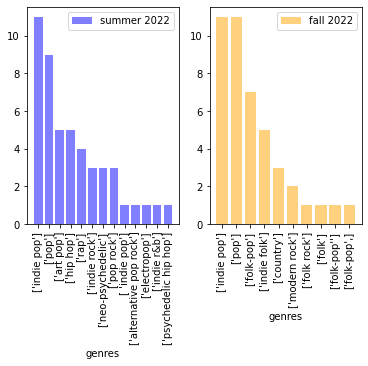

In [379]:
fig1, ax1 = plt.subplots(1, 2)

summer_2022 = season_playlist_data[season_playlist_data['playlist'] == 'summer 2022']
fall_2022 = season_playlist_data[season_playlist_data['playlist'] == 'fall 2022']

summer_counts = summer_2022.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)
fall_counts = fall_2022.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)

ax1[0].bar(summer_counts.index, alpha = 0.5, color = 'blue', label = 'summer 2022', height = summer_counts['Unnamed: 0'])
ax1[1].bar(fall_counts.index, alpha = 0.5, color = 'orange', label = 'fall 2022', height = fall_counts['Unnamed: 0'])

ax1[0].set_xlabel('genres')
ax1[1].set_xlabel('genres')
ax1[0].tick_params(axis='x', labelrotation = 90)
ax1[1].tick_params(axis='x', labelrotation = 90)

ax1[0].legend()
ax1[1].legend()

plt.show()

I then created one bar graph to compare fall 2022 and summer 2022 in one graph. This allowed me to see the overlap between the genres I listened to during these two seasons more easily. 

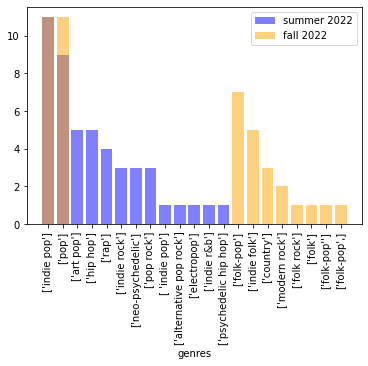

In [380]:
fig2, ax1 = plt.subplots()

summer_counts = summer_2022.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)
fall_counts = fall_2022.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)

ax1.bar(summer_counts.index, alpha = 0.5, color = 'blue', label = 'summer 2022', height = summer_counts['Unnamed: 0'])
ax1.bar(fall_counts.index, alpha = 0.5, color = 'orange', label = 'fall 2022', height = fall_counts['Unnamed: 0'])

ax1.set_xlabel('genres')
ax1.tick_params(axis='x', labelrotation = 90)

ax1.legend()

plt.show()

**From the summer 2022 and fall 2022 playlist data, I concluded that I listened to variations of pop, rock, and hip hip during the summer and variations of pop, rock, and folk in the fall. Pop and indie pop had the only cross over between the two seasons. They were also the genres most listened to both seasons.**

I created two bar graphs to compare my summer 2021 and fall 2021 playlists side by side. By having two separate graphs, I could also look at each season individually. 

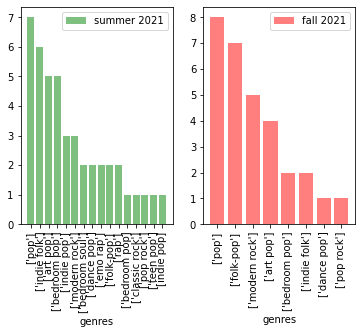

In [381]:
fig3, ax1 = plt.subplots(1, 2)

summer_2021 = season_playlist_data[season_playlist_data['playlist'] == 'summer 2021']
fall_2021 = season_playlist_data[season_playlist_data['playlist'] == 'fall 2021']

summer_counts = summer_2021.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)
fall_counts = fall_2021.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)

ax1[0].bar(summer_counts.index, alpha = 0.5, color = 'green', label = 'summer 2021', height = summer_counts['Unnamed: 0'])
ax1[1].bar(fall_counts.index, alpha = 0.5, color = 'red', label = 'fall 2021', height = fall_counts['Unnamed: 0'])

ax1[0].set_xlabel('genres')
ax1[1].set_xlabel('genres')
ax1[0].tick_params(axis='x', labelrotation = 90)
ax1[1].tick_params(axis='x', labelrotation = 90)

ax1[0].legend()
ax1[1].legend()

plt.show()

I then created one bar graph to compare fall 2021 and summer 2021 in one graph. This allowed me to see the overlap between the genres I listened to during these two seasons more easily. 

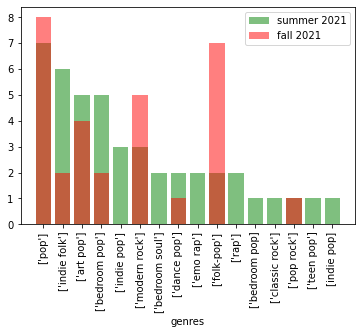

In [382]:
fig4, ax1 = plt.subplots()

summer_2021 = season_playlist_data[season_playlist_data['playlist'] == 'summer 2021']
fall_2021 = season_playlist_data[season_playlist_data['playlist'] == 'fall 2021']

summer_counts = summer_2021.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)
fall_counts = fall_2021.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)

ax1.bar(summer_counts.index, alpha = 0.5, color = 'green', label = 'summer 2021', height = summer_counts['Unnamed: 0'])
ax1.bar(fall_counts.index, alpha = 0.5, color = 'red', label = 'fall 2021', height = fall_counts['Unnamed: 0'])

ax1.set_xlabel('genres')
ax1.tick_params(axis='x', labelrotation = 90)

ax1.legend()

plt.show()

**From the summer 2021 and fall 2021 playlist data, I concluded that I listened to variations of pop most often between the two playlists. Pop and folk pop were my top genres in fall 2021. Pop and indie folk were my top genres in summer 2021. This did surprise me because I was not expecting so much variation of folk in a summer playlist.**

Then I created two bar graphs to compare my summer 2022 and summer 2021 playlists side by side. By having two separate graphs, I could also look at each year individually. 

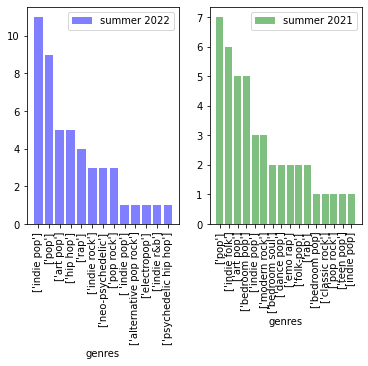

In [383]:
fig5, ax1 = plt.subplots(1, 2)

summer_2022 = season_playlist_data[season_playlist_data['playlist'] == 'summer 2022']
summer_2021 = season_playlist_data[season_playlist_data['playlist'] == 'summer 2021']

summer_counts_2022 = summer_2022.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)
summer_counts_2021 = summer_2021.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)

ax1[0].bar(summer_counts_2022.index, alpha = 0.5, color = 'blue', label = 'summer 2022', height = summer_counts_2022['Unnamed: 0'])
ax1[1].bar(summer_counts_2021.index, alpha = 0.5, color = 'green', label = 'summer 2021', height = summer_counts_2021['Unnamed: 0'])

ax1[0].set_xlabel('genres')
ax1[1].set_xlabel('genres')
ax1[0].tick_params(axis='x', labelrotation = 90)
ax1[1].tick_params(axis='x', labelrotation = 90)

ax1[0].legend()
ax1[1].legend()

plt.show()

I created one bar graph to compare summer 2021 and summer 2022 in one graph. This allowed me to see the overlap between the genres I listened to during these two years more easily. 

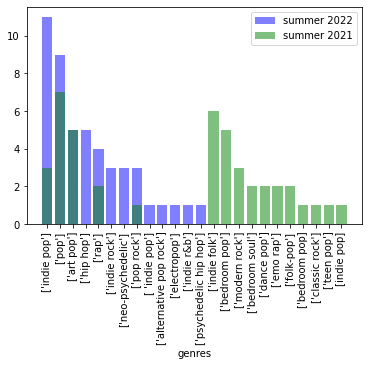

In [384]:
fig6, ax1 = plt.subplots()

summer_2022 = season_playlist_data[season_playlist_data['playlist'] == 'summer 2022']
summer_2021 = season_playlist_data[season_playlist_data['playlist'] == 'summer 2021']

summer_counts_2022 = summer_2022.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)
summer_counts_2021 = summer_2021.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)

ax1.bar(summer_counts_2022.index, alpha = 0.5, color = 'blue', label = 'summer 2022', height = summer_counts_2022['Unnamed: 0'])
ax1.bar(summer_counts_2021.index, alpha = 0.5, color = 'green', label = 'summer 2021', height = summer_counts_2021['Unnamed: 0'])

ax1.set_xlabel('genres')
ax1.tick_params(axis='x', labelrotation = 90)

ax1.legend()

plt.show()

**When comparing summer 2021 and 2022, my music taste evolved. In summer 2021, my top genres were pop and indie folk, but in summer 2022 my top genres were pop and indie pop. However, the genres of pop, indie folk, and indie pop are all very similar. Since these are both summer playlists from a year apart, it makes sense why the top genres are similar yet slightly evolved.**

I created two bar graphs to compare my fall 2022 and fall 2021 playlists side by side. By having two separate graphs, I could also look at each year individually. 

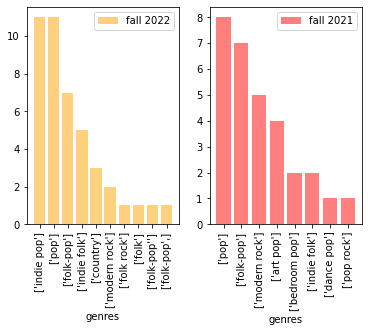

In [385]:
fig7, ax1 = plt.subplots(1, 2)

fall_2022 = season_playlist_data[season_playlist_data['playlist'] == 'fall 2022']
fall_2021 = season_playlist_data[season_playlist_data['playlist'] == 'fall 2021']

fall_counts_2022 = fall_2022.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)
fall_counts_2021 = fall_2021.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)

ax1[0].bar(fall_counts_2022.index, alpha = 0.5, color = 'orange', label = 'fall 2022', height = fall_counts_2022['Unnamed: 0'])
ax1[1].bar(fall_counts_2021.index, alpha = 0.5, color = 'red', label = 'fall 2021', height = fall_counts_2021['Unnamed: 0'])

ax1[0].set_xlabel('genres')
ax1[1].set_xlabel('genres')
ax1[0].tick_params(axis='x', labelrotation = 90)
ax1[1].tick_params(axis='x', labelrotation = 90)

ax1[0].legend()
ax1[1].legend()

plt.show()

I created one bar graph to compare fall 2021 and fall 2022 in one graph. This allowed me to see the overlap between the genres I listened to during these two years more easily.

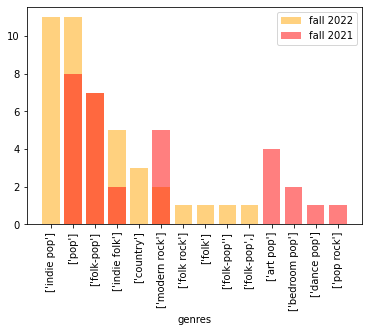

In [386]:
fig8, ax1 = plt.subplots()

fall_2022 = season_playlist_data[season_playlist_data['playlist'] == 'fall 2022']
fall_2021 = season_playlist_data[season_playlist_data['playlist'] == 'fall 2021']

fall_counts_2022 = fall_2022.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)
fall_counts_2021 = fall_2021.groupby('genres').count().sort_values('Unnamed: 0', ascending = False)

ax1.bar(fall_counts_2022.index, alpha = 0.5, color = 'orange', label = 'fall 2022', height = fall_counts_2022['Unnamed: 0'])
ax1.bar(fall_counts_2021.index, alpha = 0.5, color = 'red', label = 'fall 2021', height = fall_counts_2021['Unnamed: 0'])

ax1.set_xlabel('genres')
ax1.tick_params(axis='x', labelrotation = 90)

ax1.legend()

plt.show()

**In fall 2021, my top genres were pop and folk-pop. In fall 2022, my top genres were indie pop and pop. Like all the other graphs, the most overlap was in the pop genre. I am surprised to see modern rock was my third most listened to genre on my fall 2021 playlist.**

**When comparing all the genre and year combinations, I am not surprised to see variations of pop and folk show up most often in all the playlists. However, in the summer playlists, I did see a broader range of genres explored than in the fall. For example, in summer 2022 I had songs on my playlist in the psychedelic hip-hop and indie r&b genres. Even though it was just one song in each, this was adventurous for me based on my fall playlists that were almost exclusively pop and folk music.**

To address my original question "If I listen to different genres at different times of year or if I have favorite genres that surpass the boundaries of seasons?" I can conclude both statements are true. Some genres such as variations of pop and folk appear heavily in all playlists. However, some genres are more season specific, such as rap and hip hop appearing exclusively in the summer.

I am slightly surprised with these results because I did not realize how much I like variations of folk music during all times of year. I thought I preferred folk only in the fall. Moving forward, I hope to use these results motivate myself to diversify my listening all year round.